In [14]:
import torchvision
import torchvision.transforms.v2
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

from IPython.display import clear_output

import numpy as np
import mnist

In [15]:
# Для скачивания датасета укажите donwload=True и укажит папку вместо ./mnist
train_dataset = torchvision.datasets.MNIST('./mnist', 
                                            transform=torchvision.transforms.v2.Compose([
                                               torchvision.transforms.v2.ToImage(),
                                               torchvision.transforms.v2.ConvertImageDtype(torch.float),
                                           ]),
                                           download=False,
                                           train=True)
test_dataset = torchvision.datasets.MNIST('./mnist', 
                                            transform=torchvision.transforms.v2.Compose([
                                               torchvision.transforms.v2.ToImage(),
                                               torchvision.transforms.v2.ConvertImageDtype(torch.float),
                                           ]),
                                           download=False,
                                           train=False)

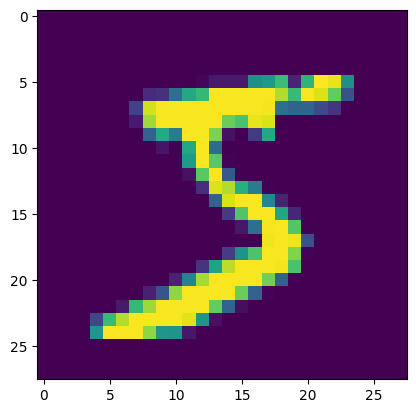

In [16]:
# 28 x 28 
plt.imshow(train_dataset[0][0].permute((1, 2, 0)))

In [17]:
train_dataset[0][0]

Image([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [ ]:
class NumberForecaster(nn.Module):
    def __init__(self, input_size, output_size):
        super(NumberForecaster, self).__init__()
        self.fc = nn.Linear(input_size, input_size // 2) 
        self.hl = nn.Linear(input_size // 2, output_size)
        self.dec = nn.LogSoftmax(dim=1)

    def forward(self, x):
        # Преобразуем изображение в вектор
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc(x))
        x = self.hl(x)
        x = self.dec(x)
        return x

In [19]:
number_forecaster = NumberForecaster(28 * 28, 10)

In [20]:
optimizer = torch.optim.Adam(number_forecaster.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

In [21]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

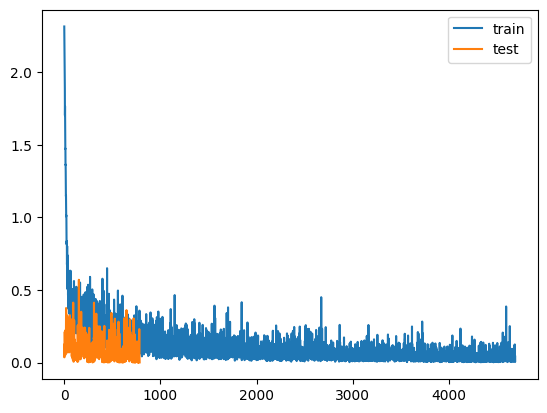

In [23]:
# Цикл обучения

loss_history_train = []
loss_history_test = []

num_epochs = 5
for epoch in range(num_epochs):
    number_forecaster.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = number_forecaster(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loss_history_train.append(loss.item())

    with torch.no_grad():
        number_forecaster.eval()
        predictions = []
        for images, labels in test_loader:
            outputs = number_forecaster(images)
            loss = criterion(outputs, labels)
            loss_history_test.append(loss.item())

    clear_output(wait=True)
    figure = plt.figure()
    plt.plot(loss_history_train, label='train')
    plt.plot(loss_history_test, label='test')
    plt.legend()

    plt.show()

In [26]:
np.mean(loss_history_test[len(loss_history_test) // epoch:])

np.float64(0.07484339297453024)